<a href="https://colab.research.google.com/github/romaniuk-o/Python_Data_Science_HW10/blob/main/HW_10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету [`fasion_mnist`](https://www.tensorflow.org/datasets/catalog/fashion_mnist).

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з такими параметрами мережі як: кількість шарів, кількість нейронів, функції активації, кількість епох, розмір батчу і т.д. Рішення оформіть у вигляді окремого ноутбука.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [52]:
# Завантаження даних fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [53]:
# Перетворення даних в одновимірний вектор
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Кодування цільових змінних в one-hot формат
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [54]:
# Створення моделі нейронної мережі
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
# Зберігаємо історію навчання
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))



Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4915 - accuracy: 0.8250 - val_loss: 0.4060 - val_accuracy: 0.8523
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3547 - accuracy: 0.8713 - val_loss: 0.3828 - val_accuracy: 0.8579
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3186 - accuracy: 0.8837 - val_loss: 0.4313 - val_accuracy: 0.8468
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2975 - accuracy: 0.8888 - val_loss: 0.3443 - val_accuracy: 0.8746
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2778 - accuracy: 0.8965 - val_loss: 0.3381 - val_accuracy: 0.8794
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2650 - accuracy: 0.9008 - val_loss: 0.3480 - val_accuracy: 0.8753
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2519 - accuracy: 0.9052 - val_loss: 0.3735 - val_accuracy: 0.8618

In [56]:
# Отримуємо дані про похибку та точність з історії навчання
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']



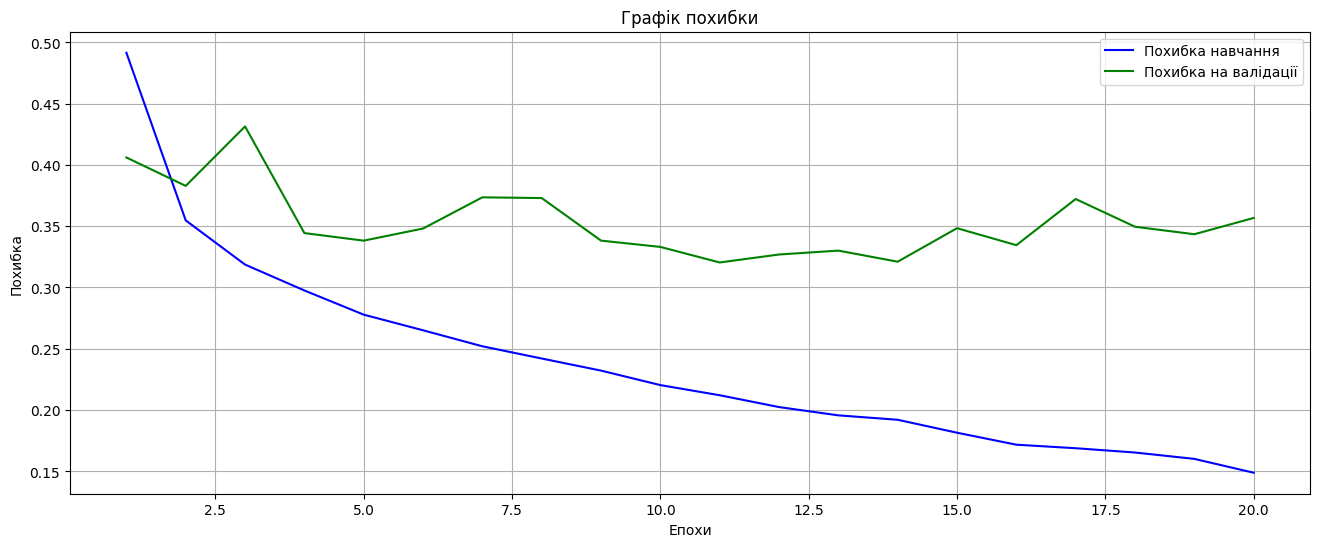

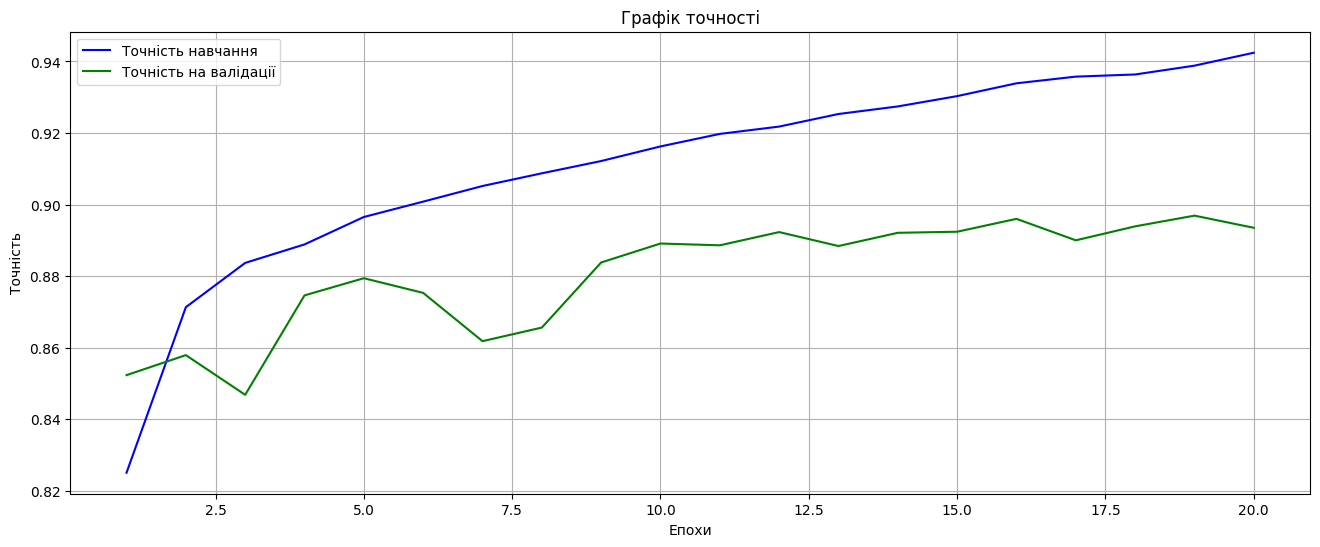

In [60]:
# Побудова графіка
epochs = range(1, len(train_loss) + 1)
plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(epochs, train_loss, 'b', label='Похибка навчання')
plt.plot(epochs, val_loss, 'g', label='Похибка на валідації')
plt.title('Графік похибки')
plt.xlabel('Епохи')
plt.ylabel('Похибка')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, train_accuracy, 'b', label='Точність навчання')
plt.plot(epochs, val_accuracy, 'g', label='Точність на валідації')
plt.title('Графік точності')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid()
plt.show()